In [1]:
# import pandas as pd
# import os

# # Kaggle automatically mounts datasets under /kaggle/input/
# dataset_path = "/kaggle/input/predict-calorie-expenditure"

# # List all available files in this dataset
# print("Files in dataset:", os.listdir(dataset_path))

# # Load the correct file (replace 'train.csv' with the real filename)
# df_train = pd.read_csv(f"{dataset_path}/train.csv")
# print("First 5 records:")
# print(df_train.head())


In [2]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "train.csv"

# Load the latest version
df_train = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "adilshamim8/predict-calorie-expenditure",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

file_path = "test.csv"

# Load the latest version
df_test = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "adilshamim8/predict-calorie-expenditure",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)


print("First 5 records:", df_test.head())

/tmp/ipython-input-4062744736.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df_train = kagglehub.load_dataset(
/tmp/ipython-input-4062744736.py:23: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df_test = kagglehub.load_dataset(


First 5 records:        id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  750000    male   45   177.0    81.0       7.0        87.0       39.8
1  750001    male   26   200.0    97.0      20.0       101.0       40.5
2  750002  female   29   188.0    85.0      16.0       102.0       40.4
3  750003  female   39   172.0    73.0      20.0       107.0       40.6
4  750004  female   30   173.0    67.0      16.0        94.0       40.5


In [3]:
# df_test = pd.read_csv(f"{dataset_path}/test.csv")
# print("First 5 records:")
# print(df_test.head())

In [4]:
df_train.drop(['id'],axis=1,inplace=True)
df_test.drop(['id'],axis=1,inplace=True)

In [5]:
df_train.shape

(750000, 8)

<Axes: xlabel='Age', ylabel='Count'>

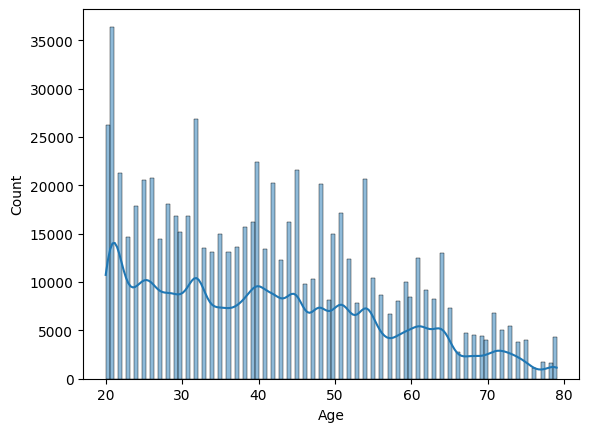

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data=df_train,x='Age',kde=True)

In [7]:
train_y=df_train['Calories']

In [8]:
df_train.drop(['Calories'],axis=1,inplace=True)

In [9]:
df_train.shape

(750000, 7)

In [10]:
df_train

Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0         male   36   189.0    82.0      26.0       101.0       41.0
1       female   64   163.0    60.0       8.0        85.0       39.7
2       female   51   161.0    64.0       7.0        84.0       39.8
3         male   20   192.0    90.0      25.0       105.0       40.7
4       female   38   166.0    61.0      25.0       102.0       40.6
...        ...  ...     ...     ...       ...         ...        ...
749995    male   28   193.0    97.0      30.0       114.0       40.9
749996  female   64   165.0    63.0      18.0        92.0       40.5
749997    male   60   162.0    67.0      29.0       113.0       40.9
749998    male   45   182.0    91.0      17.0       102.0       40.3
749999  female   39   171.0    65.0      19.0        97.0       40.6

[750000 rows x 7 columns]

In [11]:
df_train['Sex'].value_counts()

Sex
female    375721
male      374279
Name: count, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df_train['Sex']=le.fit_transform(df_train['Sex'])

In [13]:
df_train

Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0         1   36   189.0    82.0      26.0       101.0       41.0
1         0   64   163.0    60.0       8.0        85.0       39.7
2         0   51   161.0    64.0       7.0        84.0       39.8
3         1   20   192.0    90.0      25.0       105.0       40.7
4         0   38   166.0    61.0      25.0       102.0       40.6
...     ...  ...     ...     ...       ...         ...        ...
749995    1   28   193.0    97.0      30.0       114.0       40.9
749996    0   64   165.0    63.0      18.0        92.0       40.5
749997    1   60   162.0    67.0      29.0       113.0       40.9
749998    1   45   182.0    91.0      17.0       102.0       40.3
749999    0   39   171.0    65.0      19.0        97.0       40.6

[750000 rows x 7 columns]

In [14]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()



In [15]:
lr.fit(df_train,train_y)

LinearRegression()

In [16]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df_test['Sex']=le.fit_transform(df_test['Sex'])

In [17]:
pred=lr.predict(df_test)

In [18]:
pred

array([ 21.42054033, 114.68793682,  93.22868926, ...,  76.28225523,
       171.87905257,  88.49211001])

In [19]:
df_test

Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0         1   45   177.0    81.0       7.0        87.0       39.8
1         1   26   200.0    97.0      20.0       101.0       40.5
2         0   29   188.0    85.0      16.0       102.0       40.4
3         0   39   172.0    73.0      20.0       107.0       40.6
4         0   30   173.0    67.0      16.0        94.0       40.5
...     ...  ...     ...     ...       ...         ...        ...
249995    0   56   159.0    62.0       6.0        85.0       39.4
249996    1   32   202.0   101.0       3.0        84.0       38.4
249997    0   31   164.0    64.0      14.0        98.0       40.1
249998    0   62   158.0    61.0      25.0       106.0       40.7
249999    1   31   199.0    96.0      15.0        98.0       39.9

[250000 rows x 7 columns]

**Analysis**

In [20]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "train.csv"

# Load the latest version
df_train = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "adilshamim8/predict-calorie-expenditure",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

file_path = "test.csv"

# Load the latest version
df_test = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "adilshamim8/predict-calorie-expenditure",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)


print("First 5 records:", df_test.head())

/tmp/ipython-input-4062744736.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df_train = kagglehub.load_dataset(
/tmp/ipython-input-4062744736.py:23: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df_test = kagglehub.load_dataset(


First 5 records:        id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  750000    male   45   177.0    81.0       7.0        87.0       39.8
1  750001    male   26   200.0    97.0      20.0       101.0       40.5
2  750002  female   29   188.0    85.0      16.0       102.0       40.4
3  750003  female   39   172.0    73.0      20.0       107.0       40.6
4  750004  female   30   173.0    67.0      16.0        94.0       40.5


In [21]:
df_train

id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0            0    male   36   189.0    82.0      26.0       101.0       41.0   
1            1  female   64   163.0    60.0       8.0        85.0       39.7   
2            2  female   51   161.0    64.0       7.0        84.0       39.8   
3            3    male   20   192.0    90.0      25.0       105.0       40.7   
4            4  female   38   166.0    61.0      25.0       102.0       40.6   
...        ...     ...  ...     ...     ...       ...         ...        ...   
749995  749995    male   28   193.0    97.0      30.0       114.0       40.9   
749996  749996  female   64   165.0    63.0      18.0        92.0       40.5   
749997  749997    male   60   162.0    67.0      29.0       113.0       40.9   
749998  749998    male   45   182.0    91.0      17.0       102.0       40.3   
749999  749999  female   39   171.0    65.0      19.0        97.0       40.6   

        Calories  
0          150.0  
1           34.0  
2           29.0  
3          140.0  
4          146.0  
...          ...  
749995     230.0  
749996      96.0  
749997     221.0  
749998     109.0  
749999     103.0  

[750000 rows x 9 columns]

In [22]:
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()

In [23]:
df_train['Sex']=lb.fit_transform(df_train['Sex'])

In [24]:
df_train

id  Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0            0    1   36   189.0    82.0      26.0       101.0       41.0   
1            1    0   64   163.0    60.0       8.0        85.0       39.7   
2            2    0   51   161.0    64.0       7.0        84.0       39.8   
3            3    1   20   192.0    90.0      25.0       105.0       40.7   
4            4    0   38   166.0    61.0      25.0       102.0       40.6   
...        ...  ...  ...     ...     ...       ...         ...        ...   
749995  749995    1   28   193.0    97.0      30.0       114.0       40.9   
749996  749996    0   64   165.0    63.0      18.0        92.0       40.5   
749997  749997    1   60   162.0    67.0      29.0       113.0       40.9   
749998  749998    1   45   182.0    91.0      17.0       102.0       40.3   
749999  749999    0   39   171.0    65.0      19.0        97.0       40.6   

        Calories  
0          150.0  
1           34.0  
2           29.0  
3          140.0  
4          146.0  
...          ...  
749995     230.0  
749996      96.0  
749997     221.0  
749998     109.0  
749999     103.0  

[750000 rows x 9 columns]

In [25]:
lb.classes_

array(['female', 'male'], dtype=object)

In [26]:
df_train.drop(['id'],axis=1,inplace=True)

In [27]:
df_train

Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0         1   36   189.0    82.0      26.0       101.0       41.0     150.0
1         0   64   163.0    60.0       8.0        85.0       39.7      34.0
2         0   51   161.0    64.0       7.0        84.0       39.8      29.0
3         1   20   192.0    90.0      25.0       105.0       40.7     140.0
4         0   38   166.0    61.0      25.0       102.0       40.6     146.0
...     ...  ...     ...     ...       ...         ...        ...       ...
749995    1   28   193.0    97.0      30.0       114.0       40.9     230.0
749996    0   64   165.0    63.0      18.0        92.0       40.5      96.0
749997    1   60   162.0    67.0      29.0       113.0       40.9     221.0
749998    1   45   182.0    91.0      17.0       102.0       40.3     109.0
749999    0   39   171.0    65.0      19.0        97.0       40.6     103.0

[750000 rows x 8 columns]

In [28]:
df_train.describe()

Sex            Age         Height         Weight  \
count  750000.000000  750000.000000  750000.000000  750000.000000   
mean        0.499039      41.420404     174.697685      75.145668   
std         0.499999      15.175049      12.824496      13.982704   
min         0.000000      20.000000     126.000000      36.000000   
25%         0.000000      28.000000     164.000000      63.000000   
50%         0.000000      40.000000     174.000000      74.000000   
75%         1.000000      52.000000     185.000000      87.000000   
max         1.000000      79.000000     222.000000     132.000000   

            Duration     Heart_Rate      Body_Temp       Calories  
count  750000.000000  750000.000000  750000.000000  750000.000000  
mean       15.421015      95.483995      40.036253      88.282781  
std         8.354095       9.449845       0.779875      62.395349  
min         1.000000      67.000000      37.100000       1.000000  
25%         8.000000      88.000000      39.600000      34.000000  
50%        15.000000      95.000000      40.300000      77.000000  
75%        23.000000     103.000000      40.700000     136.000000  
max        30.000000     128.000000      41.500000     314.000000

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sex         750000 non-null  int64  
 1   Age         750000 non-null  int64  
 2   Height      750000 non-null  float64
 3   Weight      750000 non-null  float64
 4   Duration    750000 non-null  float64
 5   Heart_Rate  750000 non-null  float64
 6   Body_Temp   750000 non-null  float64
 7   Calories    750000 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 45.8 MB


In [30]:
df_train.isna().sum()

Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [31]:
# !pip install ydata-profiling
from ydata_profiling import ProfileReport

In [32]:
report=ProfileReport(df_train,title='profile report/')

In [33]:
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 8/8 [00:01<00:00,  5.43it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<Axes: xlabel='Sex', ylabel='Calories'>

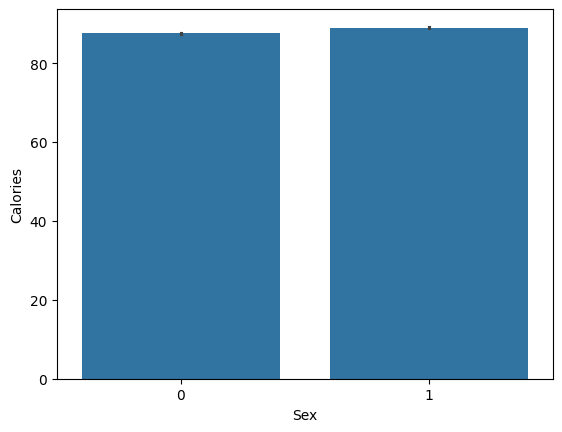

In [34]:
sns.barplot(data=df_train,x='Sex',y='Calories')

<Axes: xlabel='Age', ylabel='Count'>

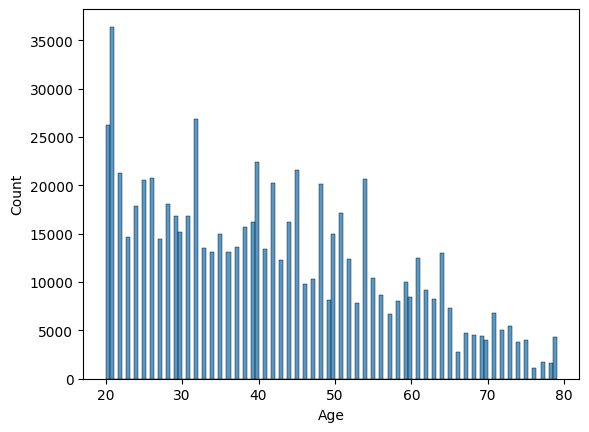

In [35]:
sns.histplot(data=df_train,x="Age")

<Axes: xlabel='Weight', ylabel='Count'>

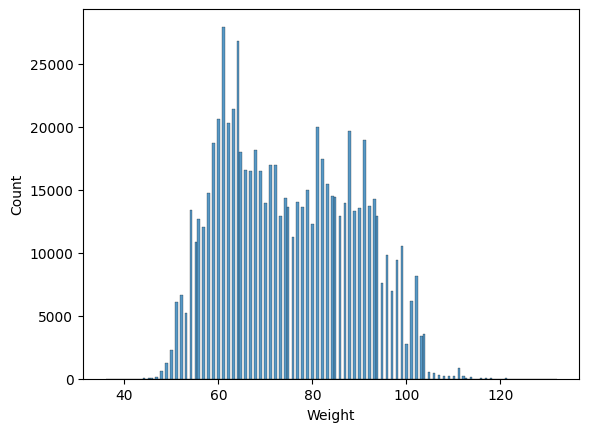

In [36]:
sns.histplot(data=df_train,x="Weight")

<Axes: xlabel='Height', ylabel='Count'>

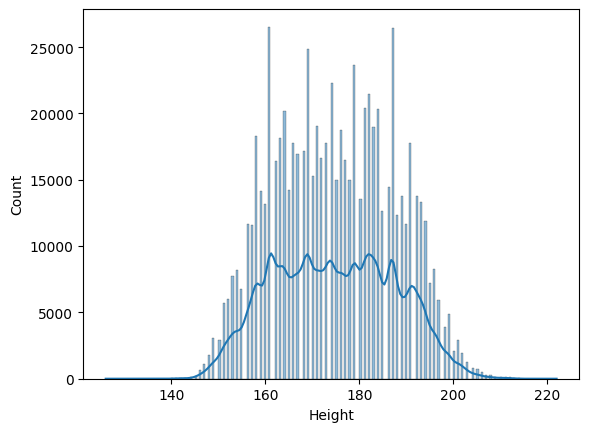

In [37]:
sns.histplot(data=df_train,x="Height",kde=True)

<Axes: xlabel='Duration', ylabel='Calories'>

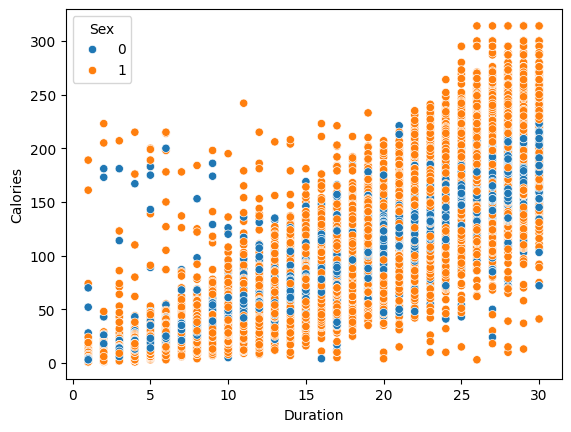

In [38]:
sns.scatterplot(data=df_train,x='Duration',y='Calories',hue='Sex')

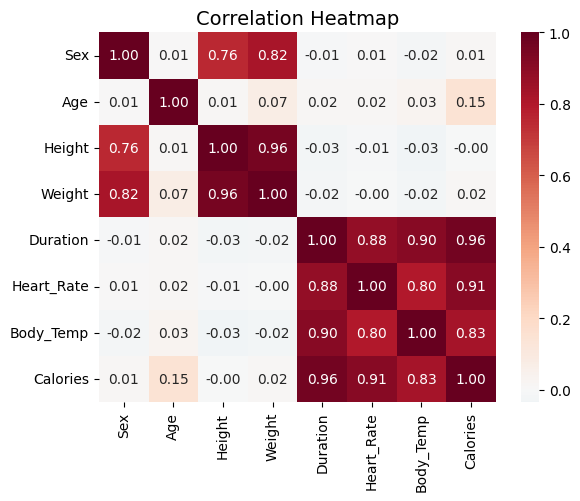

In [39]:

sns.heatmap(df_train.corr(numeric_only=True),annot=True,fmt='.2f',cmap='RdBu_r',center=0)

plt.title('Correlation Heatmap',fontsize=14)
plt.show()

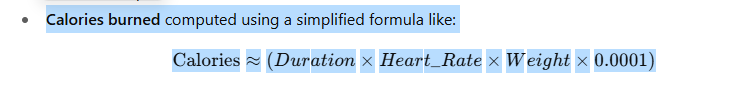

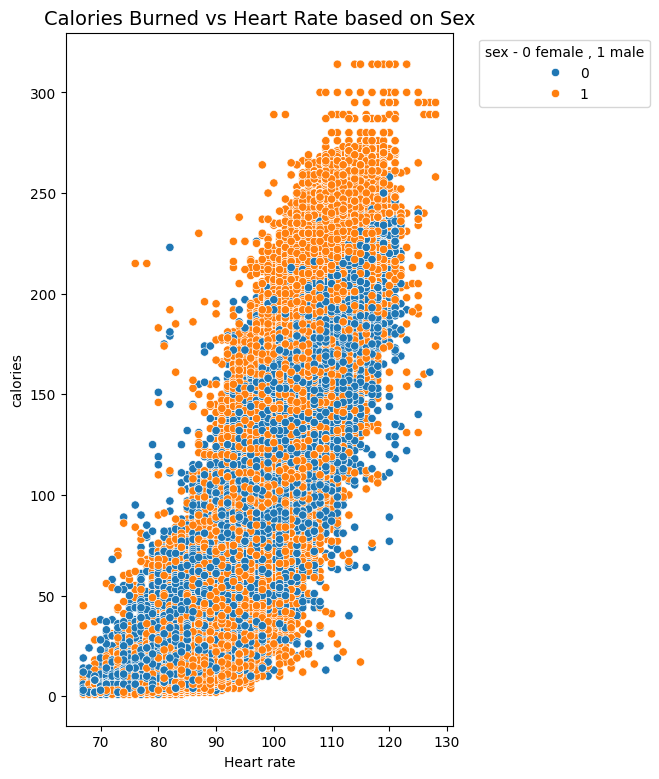

In [40]:
plt.figure(figsize=(5,9))
plt.title('Calories Burned vs Heart Rate based on Sex',fontsize=14)
sns.scatterplot(data=df_train,x='Heart_Rate',y='Calories',hue='Sex')
plt.xlabel('Heart rate')
plt.ylabel('calories')
plt.legend(title='sex - 0 female , 1 male',bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()

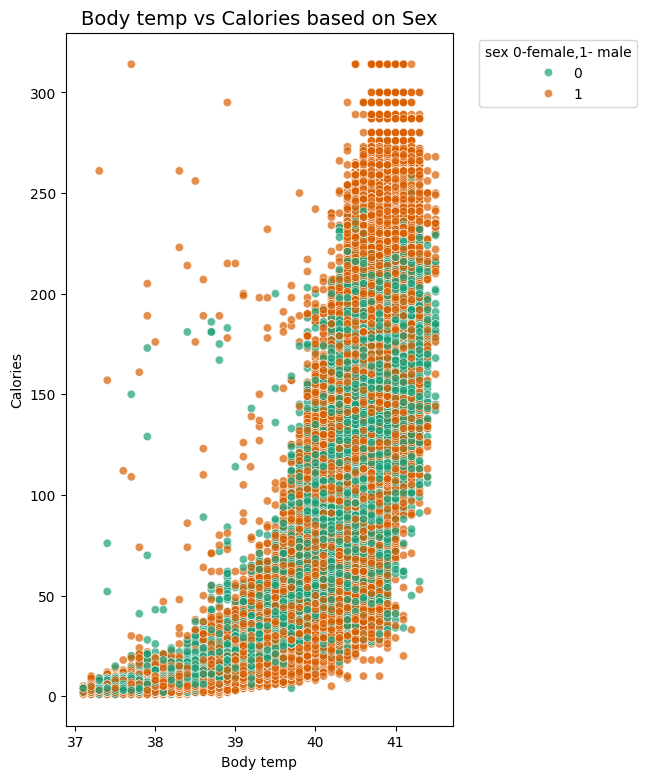

In [41]:
plt.figure(figsize=(5,9))
plt.title('Body temp vs Calories based on Sex',fontsize=14)

sns.scatterplot(data=df_train,x='Body_Temp',y='Calories',hue='Sex',alpha=0.7,
    palette="Dark2")
plt.xlabel('Body temp')
plt.ylabel('Calories')

plt.legend(title='sex 0-female,1- male',bbox_to_anchor=(1.05,1),loc='upper left')

plt.show()

In [42]:
average_duration=df_train.groupby('Duration')['Calories'].mean()

In [43]:
average_duration.head(4)

Duration
1.0     3.360215
2.0     6.839292
3.0    10.756930
4.0    14.516731
Name: Calories, dtype: float64

In [44]:
average_heartrate=df_train.groupby('Heart_Rate')['Calories'].mean()
average_body_Temp=df_train.groupby('Body_Temp')['Calories'].mean()

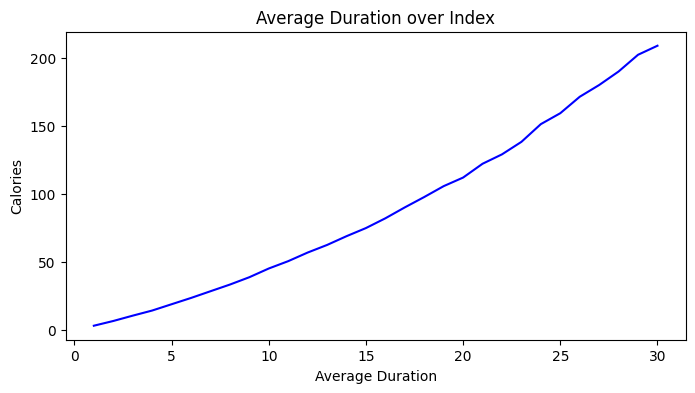

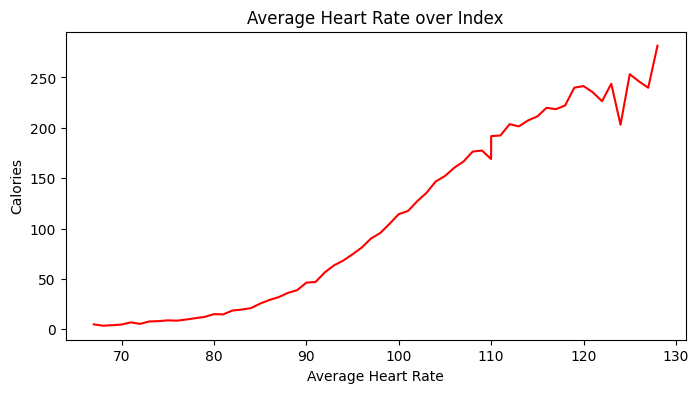

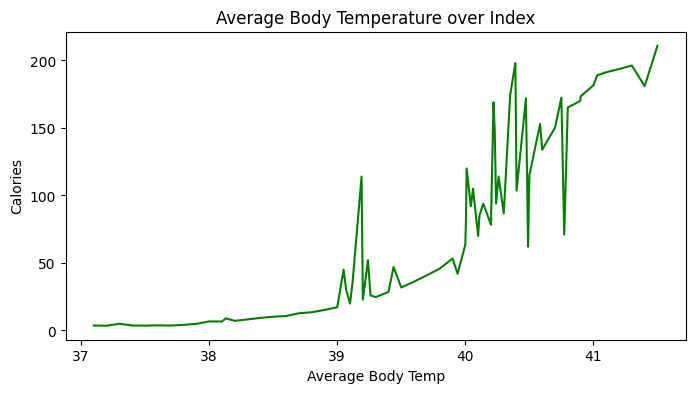

In [45]:
import matplotlib.pyplot as plt

# Average Duration
plt.figure(figsize=(8,4))
plt.plot(average_duration.index, average_duration, color='blue')
plt.title('Average Duration over Index')
plt.ylabel('Calories')
plt.xlabel('Average Duration')
plt.show()

# Average Heart Rate
plt.figure(figsize=(8,4))
plt.plot(average_heartrate.index, average_heartrate, color='red')
plt.title('Average Heart Rate over Index')
plt.ylabel('Calories')
plt.xlabel('Average Heart Rate')
plt.show()

# Average Body Temperature
plt.figure(figsize=(8,4))
plt.plot(average_body_Temp.index, average_body_Temp, color='green')
plt.title('Average Body Temperature over Index')
plt.ylabel('Calories')
plt.xlabel('Average Body Temp')
plt.show()


In [46]:
lr=LinearRegression()

In [48]:
df_train

Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0         1   36   189.0    82.0      26.0       101.0       41.0     150.0
1         0   64   163.0    60.0       8.0        85.0       39.7      34.0
2         0   51   161.0    64.0       7.0        84.0       39.8      29.0
3         1   20   192.0    90.0      25.0       105.0       40.7     140.0
4         0   38   166.0    61.0      25.0       102.0       40.6     146.0
...     ...  ...     ...     ...       ...         ...        ...       ...
749995    1   28   193.0    97.0      30.0       114.0       40.9     230.0
749996    0   64   165.0    63.0      18.0        92.0       40.5      96.0
749997    1   60   162.0    67.0      29.0       113.0       40.9     221.0
749998    1   45   182.0    91.0      17.0       102.0       40.3     109.0
749999    0   39   171.0    65.0      19.0        97.0       40.6     103.0

[750000 rows x 8 columns]

In [61]:
x=df_train[['Duration','Heart_Rate','Body_Temp']]
y=df_train['Calories']

In [62]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=42,test_size=0.2)

In [63]:
train_x.shape,train_y.shape,test_x.shape,test_y.shape

((600000, 3), (600000,), (150000, 3), (150000,))

In [64]:
lr.fit(train_x,train_y)

LinearRegression()

In [65]:
prediction=lr.predict(test_x)

In [66]:
prediction

array([190.40992068,  64.62946104,  41.66138517, ...,  47.55094747,
        39.20587112, 167.16135056])

In [67]:
from sklearn.metrics import r2_score,mean_squared_error,root_mean_squared_error

In [68]:
r2score=r2_score(test_y,prediction)
mse=mean_squared_error(test_y,prediction)
rmse=root_mean_squared_error(test_y,prediction)
adjust2score=((1-r2score)*(test_x.shape[0]-1))/(test_x.shape[0]-test_x.shape[1]-1)

In [69]:
print('r2_score:',r2score)
print('mse:',mse)
print('rmse:',rmse)
print('adjusted_2_score:',adjust2score)

r2_score: 0.9501801473942783
mse: 193.08259991455083
rmse: 13.895416507415344
adjusted_2_score: 0.04982084902934516


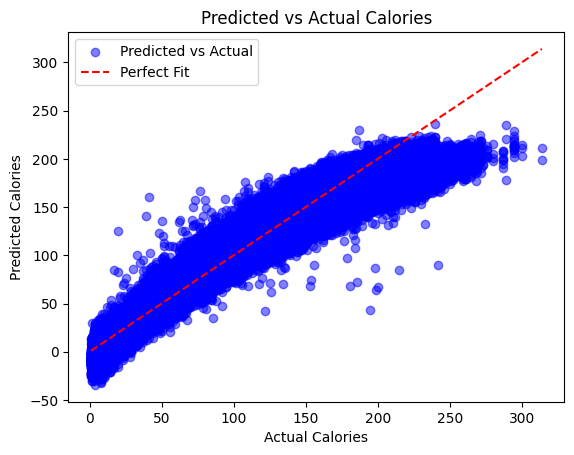

In [76]:
plt.scatter(test_y, prediction, color='blue', alpha=0.5, label="Predicted vs Actual")
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'r--', label="Perfect Fit")

plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Predicted vs Actual Calories")
plt.legend()
plt.show()


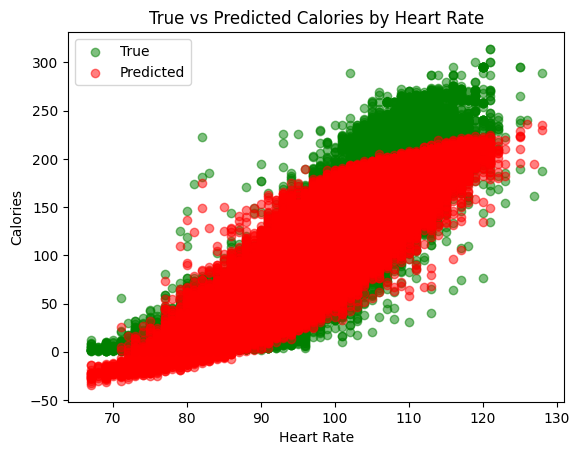

In [77]:
import matplotlib.pyplot as plt

# Scatter: True values
plt.scatter(test_x['Heart_Rate'], test_y, color='green', alpha=0.5, label="True")

# Scatter: Predicted values
plt.scatter(test_x['Heart_Rate'], prediction, color='red', alpha=0.5, label="Predicted")

plt.xlabel("Heart Rate")
plt.ylabel("Calories")
plt.title("True vs Predicted Calories by Heart Rate")
plt.legend()
plt.show()


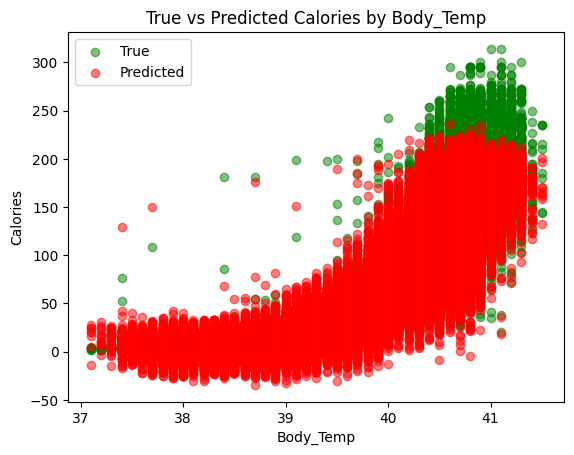

In [79]:
import matplotlib.pyplot as plt

# Scatter: True values
plt.scatter(test_x['Body_Temp'], test_y, color='green', alpha=0.5, label="True")

# Scatter: Predicted values
plt.scatter(test_x['Body_Temp'], prediction, color='red', alpha=0.5, label="Predicted")

plt.xlabel("Body_Temp")
plt.ylabel("Calories")
plt.title("True vs Predicted Calories by Body_Temp")
plt.legend()
plt.show()


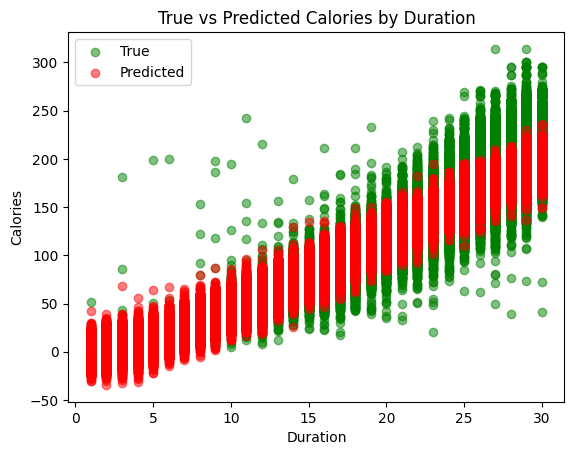

In [82]:
import matplotlib.pyplot as plt

# Scatter: True values
plt.scatter(test_x['Duration'], test_y, color='green', alpha=0.5, label="True")

# Scatter: Predicted values
plt.scatter(test_x['Duration'], prediction, color='red', alpha=0.5, label="Predicted")

plt.xlabel("Duration")
plt.ylabel("Calories")
plt.title("True vs Predicted Calories by Duration")
plt.legend()
plt.show()


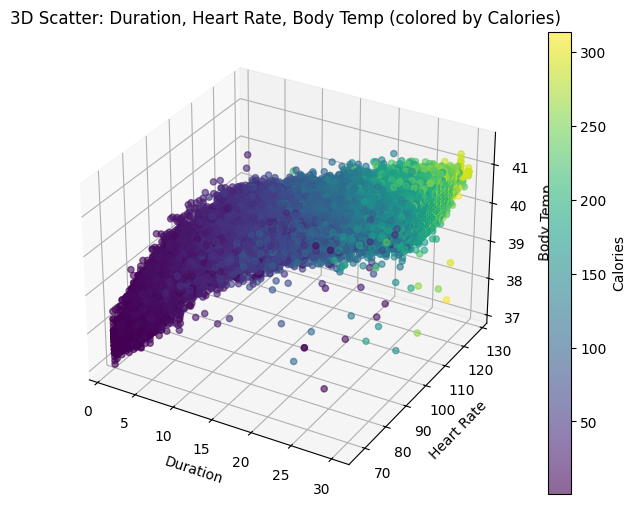

In [80]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    x['Duration'],
    x['Heart_Rate'],
    x['Body_Temp'],
    c=df_train['Calories'],
    cmap='viridis',
    alpha=0.6
)

ax.set_xlabel("Duration")
ax.set_ylabel("Heart Rate")
ax.set_zlabel("Body Temp")
plt.title("3D Scatter: Duration, Heart Rate, Body Temp (colored by Calories)")

plt.colorbar(sc, label="Calories")
plt.show()
